# MUESTREO DE SEÑALES (CONVERSION A/D)<a class="tocSkip">
## SISTEMAS Y SEÑALES <a class="tocSkip">
### Ingenieria de Telecomunicaciones <a class="tocSkip">
### Universidad Pontificia Bolivariana <a class="tocSkip">   
### Por: Jose R. Zapata - [https://joserzapata.github.io/](https://joserzapata.github.io/) <a class="tocSkip">
**joser.zapata@upb.edu.co**

# Muestreo ideal y Reconstrucción 

[Los procesadores digitales de señal](https://es.wikipedia.org/wiki/Procesador_digital_de_se%C3%B1ales) los procesadores de propósito general solo pueden realizar operaciones aritméticas dentro de un rango de limitado de numeros . Hasta ahora consideramos señales continuas que son continuas con respecto al tiempo y sus valores de amplitud. Tales señales no pueden ser manejadas por los procesadores de manera directa. Para obtener una representación digital de una señal continua, se debe realizar una discretización tanto en tiempo como en amplitud. El primero se conoce como [*Muestreo (Sampling)*](https://es.wikipedia.org/wiki/Muestreo_digital), El ultimo como [*Cuantizacion (quantization)*](https://es.wikipedia.org/wiki/Cuantificaci%C3%B3n_digital). 
El Sampling ó muestreo se refiere al proceso de seleccionar valores de amplitud de una señal continua en instantes de tiempo discretos. La señal muestreada se denomida *Señal discreta*. 
La quantization ó cuantización se refiere al proceso de mapear una amplitud continua a un conjunto contable de valores de amplitud. 
La señal cuantificada se denomina *señal cuantificada*. Una señal que es discreta y cuantificada se denomina *señal digital*. Esto se ilustra a continuación.

![Sampling and quantization of signals](https://github.com/spatialaudio/signals-and-systems-lecture/blob/master/sampling/analog_discrete_digital.png?raw=1)


El orden de muestreo y cuantificación puede intercambiarse bajo el supuesto de que ambos son procesos sin memoria. Solo las señales digitales pueden manejarse mediante señales digitales o procesadores de propósito general. El muestreo de señales se discute como un primer paso hacia una señal digital.

## Modelo ideal de muestreo

Una señal continua $x(t)$ se muestrea tomando sus valores de amplitud en instantes de tiempo dados. Estos instantes de tiempo pueden elegirse arbitrariamente en el tiempo, pero los más comunes son los esquemas de muestreo equidistantes. El proceso de muestreo se modela multiplicando la señal continua con una serie de impulsos de Dirac. Esto constituye un modelo idealizado ya que los impulsos de Dirac no pueden realizarse en la práctica.


Para el muestreo equidistante de una señal continua $ x (t) $ con intervalo de muestreo $ T $, se lee la señal muestreada $x_\text{s}(t)$

\begin{equation}
x_\text{s}(t) = \sum_{k = - \infty}^{\infty} x(t) \cdot \delta(t - k T) = \sum_{k = - \infty}^{\infty} x(k T) \cdot \delta(t - k T)
\end{equation}

Donde la [propiedad de multiplicación](../continuous_signals/standard_signals.ipynb#Dirac-Impulse) del impulso de Dirac se utilizó para la última igualdad. La señal muestreada se compone de una serie de impulsos de Dirac equidistantes que son ponderados por los valores de amplitud de la señal continua tomada en sus instantes de tiempo.

![Ideal sampling of signals](https://github.com/spatialaudio/signals-and-systems-lecture/blob/master/sampling/ideal_sampling.png?raw=1)


La serie del impulso de Dirac está representada convenientemente por el [Dirac comb](../periodic_signals/spectrum.ipynb#The-Dirac-Comb). 
Reescribiendo los rendimientos de la señal muestreada

\begin{equation}
x_\text{s}(t) = x(t) \cdot \frac{1}{T} {\bot \!\! \bot \!\! \bot} \left( \frac{t}{T} \right)
\end{equation}


El proceso de muestreo se puede modelar multiplicando la señal continua $ x (t) $ con un Dirac comb. Las muestras $ x(k T) $ para $k\in\mathbb{Z}$ de la señal continua constituyen el [discrete (-time) signal](https://en.wikipedia.org/wiki/Discrete-time_signal) $x[k] := x(k T)$. La pregunta que surge es si y bajo qué condiciones las muestras $ x [k] $ representan completamente la señal continua y permiten una reconstrucción de la señal analógica. Para investigar esto, se deriva el espectro de la señal muestreada.

## Espectro de una señal muestreada

El espectro $ X_\text{s}(j\omega)=\mathcal{F}\{x_\text{s}(t)\ $ de la señal muestreada $ x_ \text {s} (t) $ es derivado de la aplicación del [multiplication theorem](../fourier_transform/theorems.ipynb#Multiplication-Theorem)  a la representación de la señal muestreada utilizando el Dirac comb.

\begin{equation}
\begin{split}
X_\text{s}(j \omega) &= \frac{1}{2 \pi} X(j \omega) * {\bot \!\! \bot \!\! \bot} \left( \frac{\omega}{\omega_\text{s}} \right) \\
&= \frac{1}{2 \pi} X(j \omega) * \frac{2 \pi}{T} \sum_{\mu = - \infty}^{\infty} \delta(\omega - \mu \omega_\text{s}) \\
&= \frac{1}{T} \sum_{\mu = - \infty}^{\infty} X \left(j (\omega - \mu \omega_\text{s}) \right)
\end{split}
\end{equation}

donde $ X(j\omega)=\mathcal{F}\{x(t)\}$  denota la transformada de Fourier de la señal continua, $\omega_\text{s}=2\pi\,f_\text{s}$ la frecuencia de muestreo angular y $f_\text{s}=\frac{1}{T} $ la frecuencia de muestreo. La segunda igualdad es el resultado de la definición del Dirac comb y la propiedad de escala del impulso de Dirac, la tercera de su propiedad de tamizado. El espectro de la señal muestreada consiste en una superposición de copias desplazadas del espectro de la señal continua. El espectro resultante es periódico con un período de $\omega_\text{s} $. Se puede concluir que el muestreo equidistante genera repeticiones del espectro de la señal continua.

El espectro $ X_\text{s} (j\omega) $ de una señal muestreada se ilustra en el ejemplo de una señal de paso bajo con valor real. Una señal de paso bajo $ x (t) $ es una señal con espectro de banda limitada

\begin{equation}
X(j \omega) = 0 \qquad \text{for } |\omega| > \omega_\text{u}
\end{equation}

donde $ \omega_\text{u} $ denota su límite de frecuencia superior. Para facilitar la ilustración, el espectro genérico de una señal de paso bajo de valor real continuo se representa mediante un espectro en forma de triángulo

![Spectrum of continuous low-pass signal](https://github.com/spatialaudio/signals-and-systems-lecture/blob/master/sampling/spectrum_lowpass_signal.png?raw=1)

El espectro de la señal muestreada se construye superponiendo copias desplazadas del espectro de la señal continua de paso bajo $ X (j\omega) $ en múltiplos de $\omega_\text{s}$

![Spectrum of sampled low-pass signal](https://github.com/spatialaudio/signals-and-systems-lecture/blob/master/sampling/spectrum_sampled_signal.png?raw=1)

De la ilustración se puede concluir que

* las copias desplazadas de $ X(j\omega) $ no se superponen si $\omega_\text{u} <\frac{\omega_\text {s}} {2} $. Para $ |\omega |<\omega_ \text {u} $ el espectro de la señal continua no se ve afectado por la superposición
* Para $\omega_\text{u} > \frac{\omega_\text{s}}{2}$ ocurre una superposicion que cambia el espectro de la señal continua en $|\omega| < \omega_\text{u}$

## Reconstruccion Ideal

Se plantea la cuestión de si y bajo qué condiciones se puede recuperar la señal continua de la señal muestreada. La consideración anterior reveló que el espectro $ X_ \text {s} (j\omega) $ de la señal muestreada contiene el espectro inalterado de la señal continua $ X (j\omega) $ si $ \omega_\text {u} <\frac {\omega_ \text {s}} {2} $. Por lo tanto, la señal continua se puede reconstruir a partir de la señal muestreada extrayendo el espectro de la señal continua del espectro de la señal muestreada. Esto se puede hacer aplicando un [ideal low-pass](../system_properties/idealized_systems.ipynb#Ideal-Low-Pass) con frecuencia de corte $ \omega_ \text {c} = \frac {\omega_ {s }} {2} $. Esto se ilustra a continuación.

![Ideal reconstruction of a sampled low-pass signal](https://github.com/spatialaudio/signals-and-systems-lecture/blob/master/sampling/ideal_reconstruction.png?raw=1)


donde la línea azul representa el espectro de la señal muestreada y la línea roja el espectro del paso bajo ideal. La función de transferencia $H(j\omega)$ de las lecturas de paso bajo

\begin{equation}
H(j \omega) = T \cdot \text{rect} \left( \frac{\omega}{\omega_\text{s}} \right)
\end{equation}



Su respuesta al impulso $ h (t) $ es producida por la transformada inversa de Fourier de la función de transferencia

\begin{equation}
h(t) = \text{sinc} \left( \frac{\pi t}{T} \right)
\end{equation}


La señal reconstruida $ y(t) $ se obtiene convolucionando la señal muestreada $ x_ \text {s} (t) $ con la respuesta al impulso del filtro de paso bajo. Esto produce

\begin{align}
y(t) &= x_\text{s}(t) * h(t) \\
&= \left( \sum_{k = - \infty}^{\infty} x(k T) \cdot \delta(t - k T) \right) * \text{sinc} \left( \frac{\pi t}{T} \right) \\
&= \sum_{k = - \infty}^{\infty} x(k T) \cdot \text{sinc} \left( \frac{\pi}{T} (t - k T) \right)
\end{align}

donde para la última igualdad se explotó el hecho de que $ x (k T) $ es independiente del tiempo $ t $ por el cual se realiza la convolución. La señal reconstruida viene dada por una superposición ponderada de funciones sinc desplazadas. Sus pesos están dados por las muestras $ x (k T) $ de la señal continua. La reconstrucción se ilustra en la siguiente figura.

![Interpolation of sampled signal by sinc function](https://github.com/spatialaudio/signals-and-systems-lecture/blob/master/sampling/sinc_interpolation.png?raw=1)


Los cuadros negros muestran las muestras $ x (k T) $ de la señal continua, la línea azul la señal reconstruida $ y (t) $, las líneas grises las funciones sinc ponderadas. La función sinc para $ k = 0 $ se resalta en rojo. Las amplitudes $ x (k T) $ en las posiciones muestreadas se reconstruyen perfectamente ya que 

\begin{equation}
\text{sinc} ( \frac{\pi}{T} (t - k T) ) = \begin{cases}
\text{sinc}(0) = 1 & \text{for } t=k T \\
\text{sinc}(n \pi) = 0 & \text{for } t=(k+n) T \quad , n \in \mathbb{Z} \notin \{0\} 
\end{cases}
\end{equation}


Los valores de amplitud entre las posiciones de muestreo $ t = k T $ se dan superponiendo las funciones sinc desplazadas. El proceso de calcular valores entre puntos de muestreo dados se denomina [*interpolation*](https://en.wikipedia.org/wiki/Interpolation). La reconstrucción de la señal muestreada se realiza interpolando los valores de amplitud discretos $ x (k T) $. La función sinc es el interpolador óptimo para señales de banda limitada.

# Aliasing
Hasta ahora, el caso se discutió cuando no se producen solapamientos en el espectro de la señal muestreada. Por lo tanto, cuando el límite de frecuencia superior $ \omega_ \text {u} $ de la señal de paso bajo con valor real es inferior a $ \frac {\omega_ \text {s}} {2} $. Aquí es posible una reconstrucción perfecta de la señal continua $ x (t) $ de su contraparte discreta $ x [k] $. Sin embargo, cuando no se cumple esta condición, las repeticiones del espectro de la señal continua se superponen. Esto se ilustra a continuación.

![Aliasing](https://github.com/spatialaudio/signals-and-systems-lecture/blob/master/sampling/aliasing.png?raw=1)

En este caso, no es posible una reconstrucción perfecta de la señal continua mediante filtrado de paso bajo (interpolación) de la señal muestreada. El espectro dentro de la banda de paso del paso bajo contiene contribuciones adicionales del espectro repetido de la señal continua. Estas contribuciones se conocen como [aliasing](https://en.wikipedia.org/wiki/Aliasing). De la discusión anterior sobre la reconstrucción ideal se hace evidente que los valores de amplitud se reconstruyen correctamente en los instantes de tiempo $ k T $. Sin embargo, entre estos instantes de tiempo, la señal reconstruida $ y (t) $ difiere de la señal muestreada $ x (t) $ si hay aliasing.

Click en la Imagen para el ver el video:

[![Aliasing](http://img.youtube.com/vi/Sv5TyYzuLHc/0.jpg)](https://www.youtube.com/watch?v=Sv5TyYzuLHc)

[![Aliasing Agua](http://img.youtube.com/vi/uENITui5_jU/0.jpg)](https://www.youtube.com/watch?v=uENITui5_jU)

## Teorema de muestreo para señales de paso bajo

Se puede concluir de la discusión anterior del muestreo, que una condición suficiente para la reconstrucción perfecta de una señal de paso bajo de valor real $ x (t) $ se da como

\begin{equation}
\omega_\text{s} \geq 2 \cdot \omega_\text{c}
\end{equation}

La frecuencia mínima de muestreo debe elegirse como el doble de la frecuencia más alta presente en la señal continua. Esta condición se conoce como [*Nyquist–Shannon sampling theorem*](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem). Solo si se cumple esta condición, toda la información contenida en una señal de paso bajo $ x (t) $ está representada por sus muestras $ x [k] = x (k T) $.

Dependiendo de la relación entre la frecuencia de muestreo $ \omega_ \text {s} $ y el límite superior de frecuencia $ \omega_ \text {u} $ de la señal de paso bajo, se pueden distinguir tres casos diferentes

* oversampling  $\omega_\text{s} > 2 \cdot \omega_\text{c}$
* critical sampling $\omega_\text{s} = 2 \cdot \omega_\text{c}$
* undersampling $\omega_\text{s} < 2 \cdot \omega_\text{c}$


En aplicaciones prácticas, el muestreo siempre se sobremuestrea hasta cierto punto, ya que el paso bajo ideal utilizado para reconstruir la señal continua no se puede realizar. Ejemplos de frecuencias de muestreo en audio son :

| Application | Sampling frequency $f_\text{s}$ |
|---|:---:|
| Telephone service | Narrowband: 8 kHz, Wideband: 16 kHz |
| [Compact Disc (CD)](https://en.wikipedia.org/wiki/Compact_disc) | [44.1 kHz](https://en.wikipedia.org/wiki/44,100_Hz) |
| [DVD-Audio](https://en.wikipedia.org/wiki/DVD-Audio) | 44.1, 48, 88.2, 96, 176.4, 192 kHz |

## Ejemplo: muestreo ideal y reconstrucción de una señal de coseno

A continuación se ilustra el muestreo y la reconstrucción ideales de una señal analógica $ x (t) $. Para facilitar la ilustración, se considera una señal de coseno $ x (t) = \cos (\omega_0t) $. Primero, se definen dos funciones `Python` que idealmente muestrean la señal $ x (t) $ en instantes de tiempo equidistantes $ t = k T $ y calculan la señal reconstruida $ y (t) $ de las muestras aplicando un pasa bajos ideal.

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sym.init_printing()

t = sym.symbols('t', real=True)
k = sym.symbols('k', integer=True)


def ideal_sampling(x, k, w_s):
    kappa = sym.symbols('kappa')
    xs = sym.lambdify(kappa, x.subs(t, kappa * 2 * sym.pi / w_s))
    return [xs(kappa) for kappa in k]


def ideal_reconstruction(xs, k, w_s):
    T = 2*sym.pi/w_s
    return sum(xs[n] * sym.sinc(sym.pi / T * (t - k[n] * T)) for n in range(len(k)))


Además, se define una función auxiliar para el trazado de la señal muestreada y reconstruida.

In [2]:
def plot_signals(xs, y, w_s, k):

    plt.stem(k*2*np.pi/w_s, xs, use_line_collection=True)
    plt.xlabel('$t$ in s')
    plt.ylabel('$x_s[k] = x_s(kT)$')
    plt.axis([0, 5, -1.2, 1.2])

    sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$', ylim=(-1.2, 1.2))


Ahora la señal continua $ x (t) = \cos (\omega_0 t) $ que se muestreará y reconstruirá se define y se representa para $ \omega_0 = 5 $.

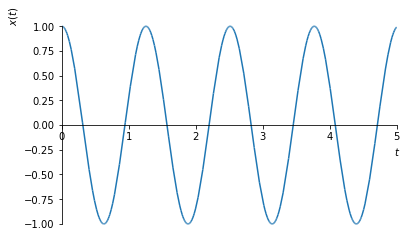

In [3]:
w_0 = 5
x = sym.cos(w_0 * t)

sym.plot(x, (t, 0, 5), xlabel=r'$t$', ylabel=r'$x(t)$');


Primero se ilustra el caso de sobremuestreo $ \omega_ \text {s}> 2 \cdot \omega_0 $ con $ \omega_ \text {s} = 50 $

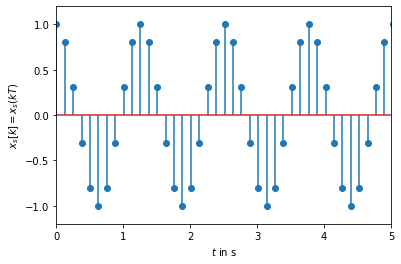

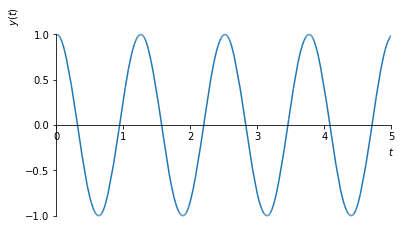

In [4]:
k = np.arange(-100, 100)

w_s = 50
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)


Luego se ilustra el caso de muestreo crítico $ \omega_ \text {s} = 2 \cdot \omega_0 $ con $ \omega_ \text {s} = 10 $

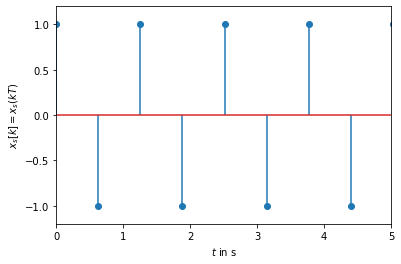

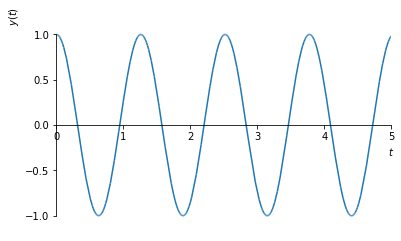

In [5]:
w_s = 10
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)


Finalmente, se ilustra el caso de submuestreo $ \omega_ \text {s} <2 \cdot \omega_0 $ con $ \omega_\text {s} = 7 $

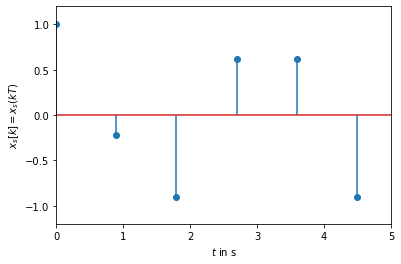

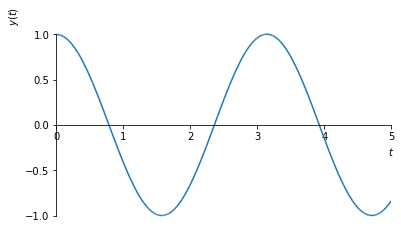

In [6]:
w_s = 7
xs = ideal_sampling(x, k, w_s)
y = ideal_reconstruction(xs, k, w_s)

plot_signals(xs, y, w_s, k)

**Ejercicio**

* Derive el espectro de la señal reconstruida para el muestreo de $ x = \cos (\omega_0 t) $ con frecuencia de muestreo $ \omega_s $ calculando

    * el espectro $ X (j \omega) $ de la señal continua
    * el espectro $ X_ \text {s} (j \omega) $ de la señal muestreada
    * el espectro $ Y (j \omega) $ de la señal reconstruida para el caso de sobremuestreo, crítica y submuestreo
    * la señal reconstruida $ y (t) $ para el caso de sobremuestreo, crítica y submuestreo
    
* Reevalúe el ejemplo anterior con $x(t) = \text{rect}(t - \frac{3}{2})$.

    * Sugerencia: defina la señal mediante `x = sym.Heaviside (t-1) - sym.Heaviside (t-2)`
    * ¿Es posible una reconstrucción perfecta? Si no, ¿por qué?

# REFERENCIAS

*Lecture Notes on Signals and Systems* by Sascha Spors.